In [1]:
import pandas as pd


## ensemble 결과와 ensemble 전 결과 비교


In [2]:
ensemble = pd.read_csv('./hard_voted_output.csv') # ensemble 한 결과 
original = pd.read_csv('./output_csv/0.8179.csv') # ensemble 전 가장 좋았던 결과

In [ ]:
sum_ensemble = 0 
for i in range(len(ensemble.iloc[0]['PredictionString'])):
    if ensemble.iloc[0]['PredictionString'][i] in ['0','1','2','3','4','5','6','7','8','9','10']:
        sum_ensemble += int(ensemble.iloc[0]['PredictionString'][i])
print(sum_ensemble)

In [4]:
sum_original = 0 # ensemble 전 파일에서의 픽셀 별 클래스의 합
for i in range(len(original.iloc[0]['PredictionString'])):
    if original.iloc[0]['PredictionString'][i] in ['0','1','2','3','4','5','6','7','8','9','10']:
        sum_original += int(original.iloc[0]['PredictionString'][i])
print(sum_original)


107528


In [5]:
cnt = 0 # ensemble 후의 파일에서의 픽셀 별 클래스의 합
for i in range(len(ensemble)):
    if ensemble.iloc[i]['PredictionString'] != original.iloc[i]['PredictionString']:
        cnt +=1
print(cnt)
    

624


## 결과 시각화

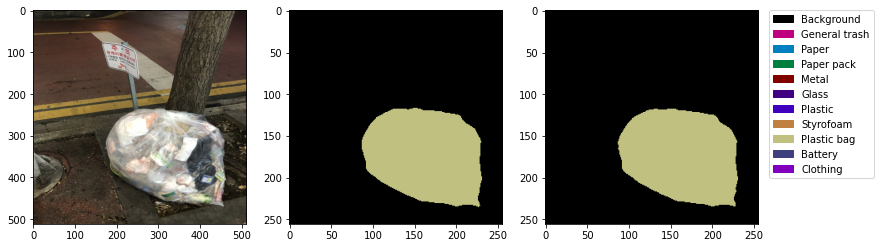

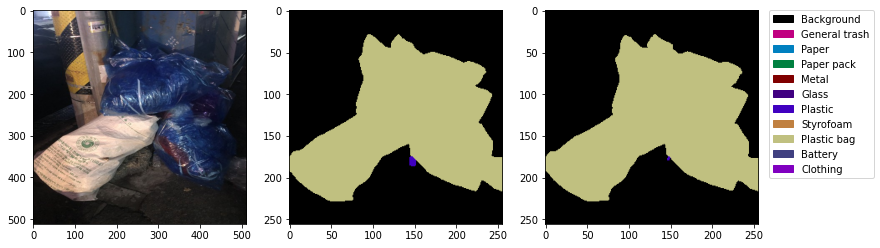

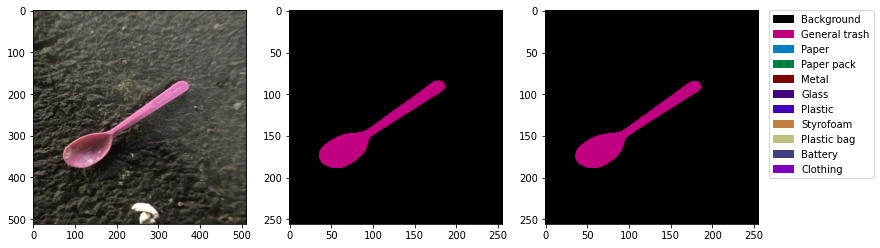

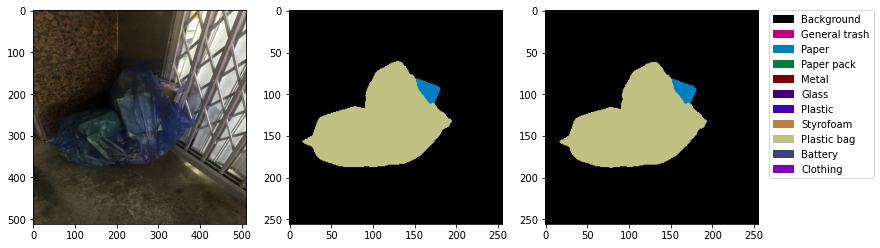

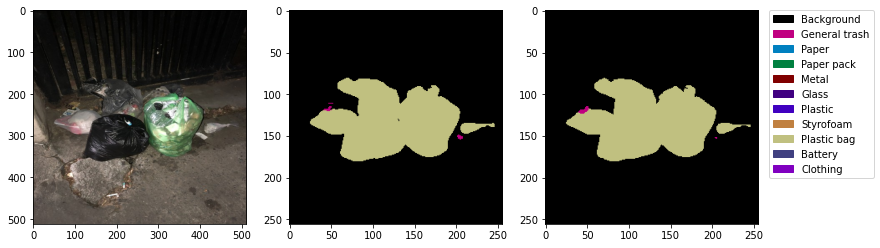

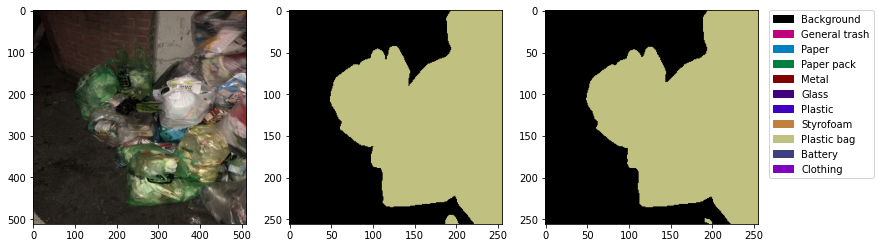

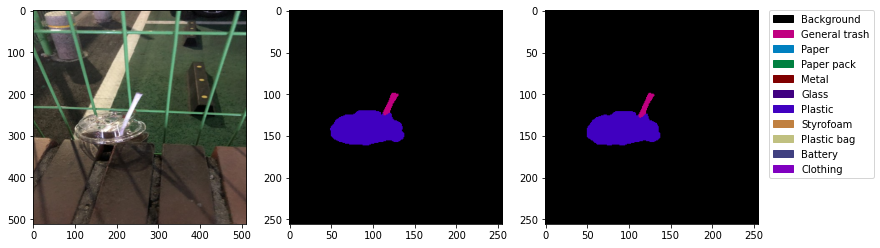

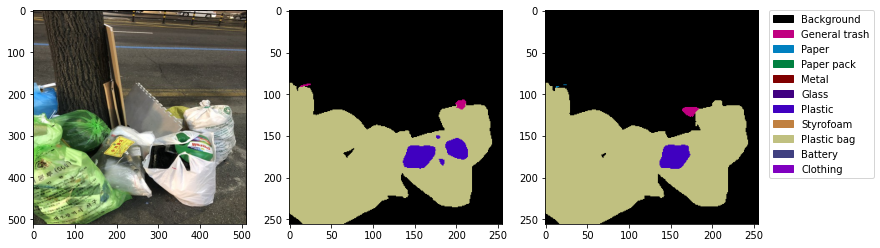

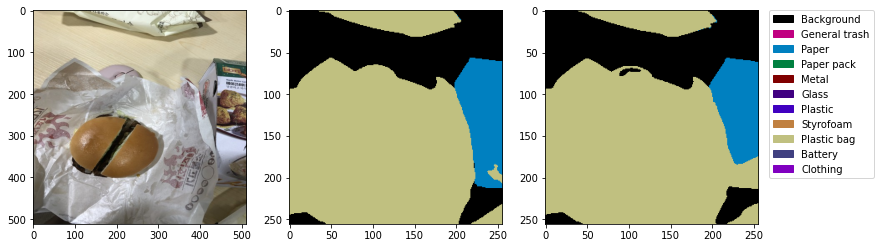

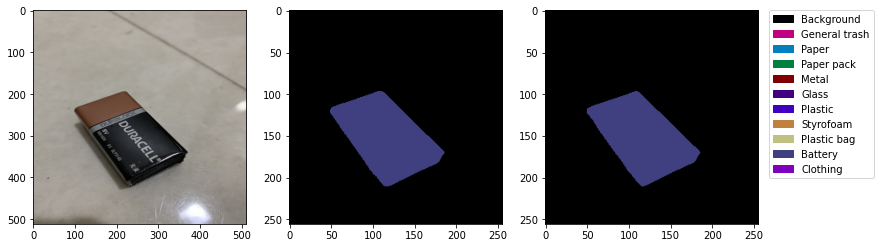

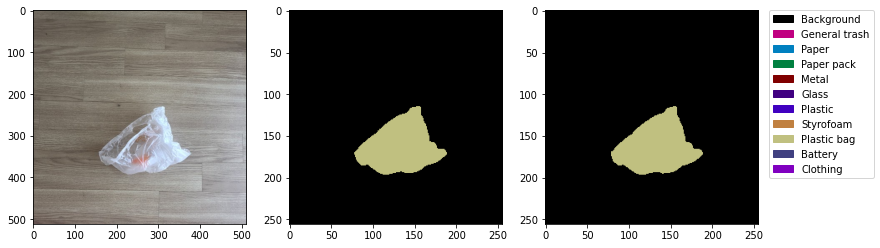

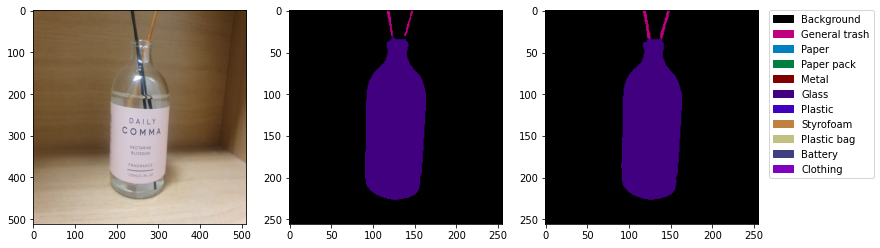

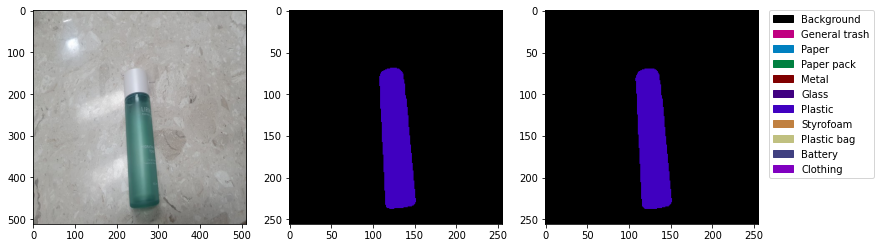

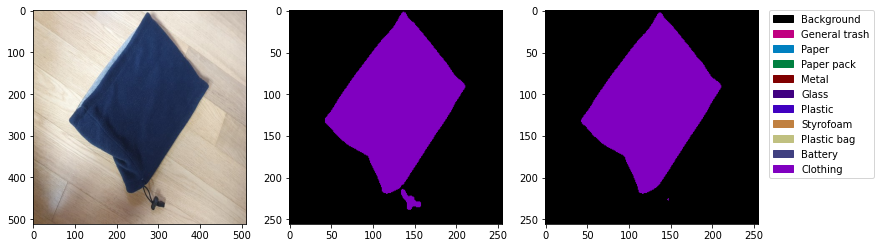

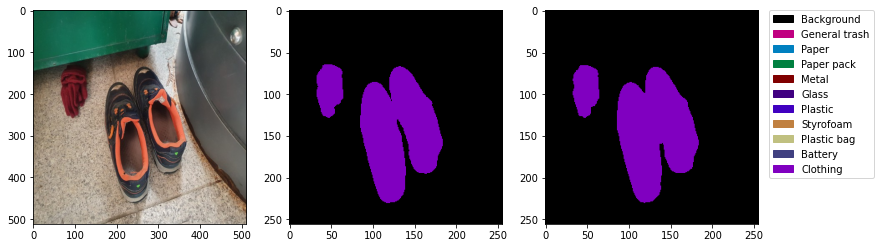

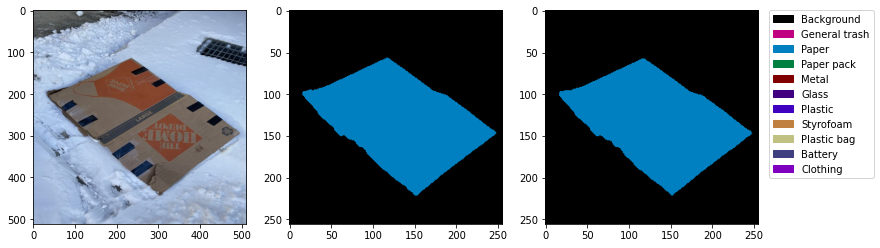

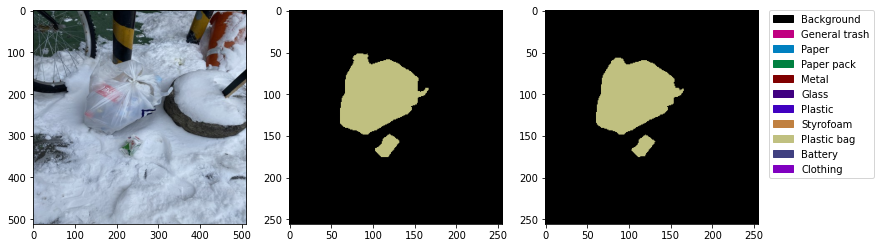

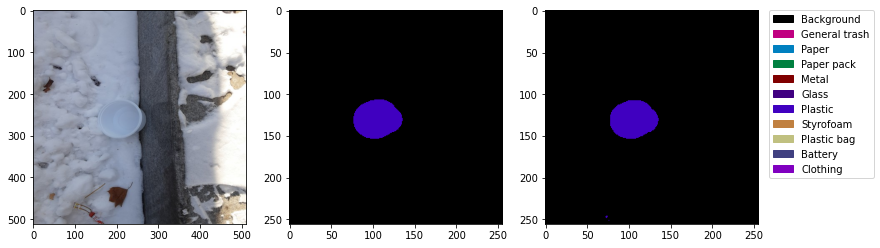

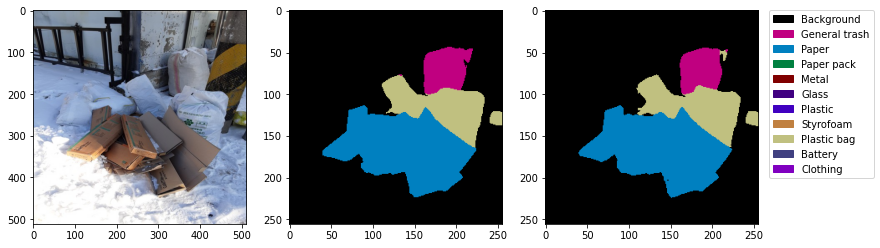

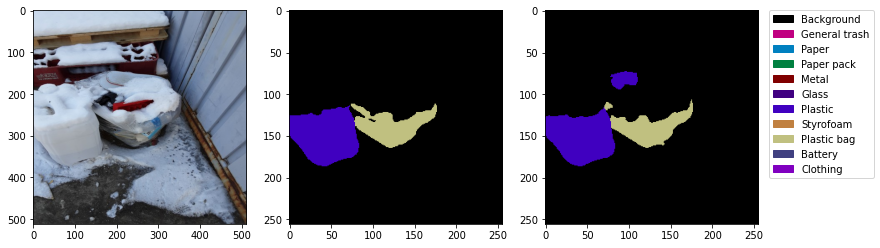

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from matplotlib.patches import Patch
import webcolors
import os

classes = ['Background', 'General trash', 'Paper', 'Paper pack', 'Metal', 'Glass', 'Plastic','Styrofoam', 'Plastic bag', 'Battery', 'Clothing']
palette = [
    [0, 0, 0],
    [192, 0, 128], [0, 128, 192], [0, 128, 64],
    [128, 0, 0], [64, 0, 128], [64, 0, 192],
    [192, 128, 64], [192, 192, 128], [64, 64, 128], [128, 0, 192]
]

img_dir = '../data' # 이미지 경로 (mmseg용이 아닌 원래 이미지 경로)
csv_dir = '/opt/ml/input/code/output (3).csv'
csv_dir1 = '/opt/ml/input/code/final.csv'
result = pd.read_csv(csv_dir)
result1 = pd.read_csv(csv_dir1)

category_and_rgb = [[classes[i], palette[i]] for i in range(11)]
legend_elements = [Patch(facecolor=webcolors.rgb_to_hex(rgb), 
                         edgecolor=webcolors.rgb_to_hex(rgb), 
                         label=category) for category, rgb in category_and_rgb]

for idx in range(20): # 한 번에 최대로 load 할 수 있는 개수가 20개
    img_file = result['image_id'][idx]
    img_path = img_dir + '/' + img_file

    
    test_img = cv2.imread(img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB).astype(np.uint8)

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 13))
    pred = np.array(result['PredictionString'][idx].split()).reshape(256, -1)
    pred_1 = np.array(result1['PredictionString'][idx].split()).reshape(256, -1)
    img_1 = np.zeros((256,256,3))
    img = np.zeros((256, 256, 3))
    for i in range(pred_1.shape[0]):
        for j in range(pred_1.shape[1]):
            img_1[i][j][0] = palette[int(pred_1[i][j])][0]
            img_1[i][j][1] = palette[int(pred_1[i][j])][1]
            img_1[i][j][2] = palette[int(pred_1[i][j])][2]
    for i in range(pred.shape[0]):
        for j in range(pred.shape[1]):
            img[i][j][0] = palette[int(pred[i][j])][0]
            img[i][j][1] = palette[int(pred[i][j])][1]
            img[i][j][2] = palette[int(pred[i][j])][2]

    axes[0].imshow(test_img) # 원본
    axes[1].imshow(img.astype(np.uint8)) # ensemble
    axes[2].legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
    axes[2].imshow(img_1.astype(np.uint8)) # original